### Data Exploration


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%precision 4

'%.4f'

In [2]:
df = pd.read_excel('../data/Dataset_5.xlsx', header=0, na_values='NA')

In [3]:
#df.head(2)

The dataset. 'ESN' is engine serial number. Output is 'PassFail' and 'Vibration'.Input is the rest of columns which are the measurement from the modular build.

In [4]:
#The engine serial number
#df=df.drop(labels='ESN',axis=1)

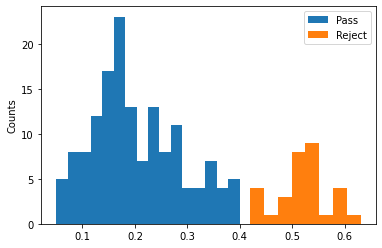

In [5]:
#Explore the distrinution of Vibration data
df_passfail=df[['PassFail','Vibration']]
df_fail_vibration=df['Vibration'][df.PassFail=='Reject']
df_pass_vibration=df['Vibration'][df.PassFail=='Pass']

plt.hist(df_pass_vibration, bins=16, label="Pass")
plt.hist(df_fail_vibration, bins=8, label="Reject")
plt.legend()
plt.ylabel("Counts");
# Despite small data set, the distribution about similar in shape for both 'Pass' and 'Reject'.

Mean and median is relatively close. The ratio of std of both groups not more than 2.
It is kind of 2 distinct groups. <br>
Why is not a big normal distribution curve that cut off at the upper end for the "Reject"?

In view of the small dataset the distribution of the Vabration is near to normal. 

The 2 points(49 & 141) with C1 more than 45, are true 'Reject' engine. The 2 points are valid related to the "Reject'.

### Finding useful Features

In this section, we whittle down the number of features we have in the dataset.

In [6]:
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_regression,mutual_info_classif

In [7]:
df_KBest= df[['A1','A2','B1','B2','C1','D1','Ax','Bx','Ex','Fx']]
y=df['Vibration']

In [8]:
y_cat=df['PassFail'].map({'Reject':1, 'Pass':0})

In [9]:
# For 'Pass Fail' categorical
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_KBest, y_cat, test_size=0.3, random_state = 42)
skb = SelectKBest(mutual_info_regression, k=8)
skb.fit(X_train_cat, y_train_cat)

SelectKBest(k=8,
            score_func=<function mutual_info_regression at 0x0000028DCB36ADC0>)

In [10]:
skb.fit(X_train_cat, y_train_cat)

SelectKBest(k=8,
            score_func=<function mutual_info_regression at 0x0000028DCB36ADC0>)

In [11]:
skb.scores_.round(4)

array([0.0848, 0.0674, 0.    , 0.0149, 0.0123, 0.    , 0.0194, 0.    ,
       0.0553, 0.0724])

In [12]:
X_train_cat.columns[np.where(skb.scores_ > 0.05)].sort_values(ascending=False)

Index(['Fx', 'Ex', 'A2', 'A1'], dtype='object')

The 

### Prepare Data for Machine Learning
To reduce the noise, only the A1, A1, B2, Bx and Fx higher linear correlation shall be used.

In [13]:
X_cat= df[['B2', 'Fx']]
X_cat.head()

,B2,Fx
0,2.0,176
1,12.0,153
2,12.0,325
3,16.0,134
4,16.0,335


### Preprocessing

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score  # For K-Fold Cross Validation

In [15]:
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.3, random_state = 42)

In [16]:
#Normalised the features data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_cat)
X_test_scaled = sc.transform(X_test_cat)
X_cat_scaled=sc.transform(X_cat)

In [17]:
pd.DataFrame(X_train_scaled).head(2)

,0,1
0,0.808142,-0.102218
1,-0.146787,-0.615485


## Visualising the Training set results

### Logistic Regression

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


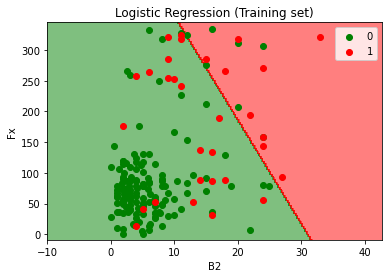

In [27]:
#Logistic Regression (Training Set)
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(C=1.0, penalty='l2')
LR_classifier.fit(X_train_scaled, y_train_cat)
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_cat_scaled), y_cat
#X_set, y_set = X_train_cat, y_train_cat
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, LR_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('green','red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green','red'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('B2')
plt.ylabel('Fx')
plt.legend()
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


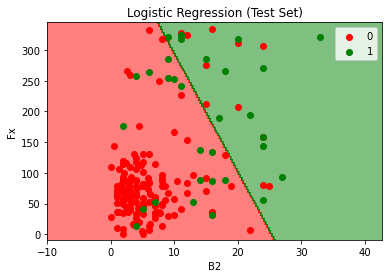

In [20]:
#Logistic Regression (Test Set)
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(C=1.0, penalty='l2')
LR_classifier.fit(X_test_scaled, y_test_cat)
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_cat_scaled), y_cat

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, LR_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('green','red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green','red'))(i), label = j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('B2')
plt.ylabel('Fx')
plt.legend()
plt.show();

### K-Neighbors KNN

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


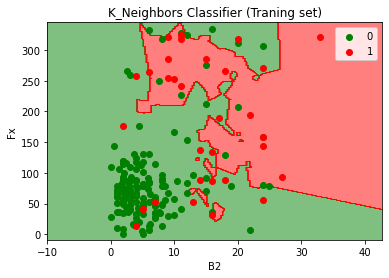

In [32]:
#KNN (Training Set)
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2, n_jobs=4)
KNN_classifier.fit(X_train_scaled, y_train_cat)

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_cat_scaled), y_cat
#X_set, y_set = X_train_cat, y_train_cat
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, KNN_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('green','red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green','red'))(i), label = j)
plt.title('K_Neighbors Classifier (Traning set)')
plt.xlabel('B2')
plt.ylabel('Fx')
plt.legend()
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


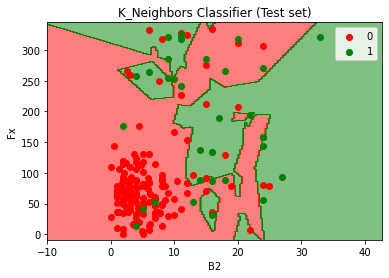

In [113]:
#KNN (Test Set)
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2, n_jobs=4)
KNN_classifier.fit(X_test_scaled, y_test_cat)

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_cat_scaled), y_cat

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, KNN_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('green','red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green','red'))(i), label = j)
plt.title('K_Neighbors Classifier (Test set)')
plt.xlabel('B2')
plt.ylabel('Fx')
plt.legend()
plt.show();


### Random Forest

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


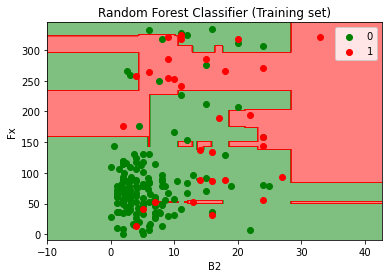

In [30]:
#Random Forest (Training Set)
from sklearn.ensemble import RandomForestClassifier
RFC_classifier = RandomForestClassifier(n_estimators= 5, criterion = 'gini')
RFC_classifier.fit(X_train_scaled, y_train_cat)

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_cat_scaled), y_cat
#X_set, y_set = X_train_cat, y_train_cat
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, RFC_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('green','red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green','red'))(i), label = j)
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('B2')
plt.ylabel('Fx')
plt.legend()
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


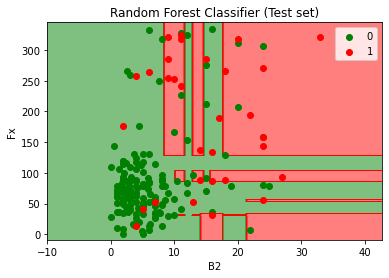

In [31]:
#Random Forest (Test Set)
from sklearn.ensemble import RandomForestClassifier
RFC_classifier = RandomForestClassifier(n_estimators= 5, criterion = 'gini')
RFC_classifier.fit(X_test_scaled, y_test_cat)

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_cat_scaled), y_cat

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, RFC_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('green','red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green','red'))(i), label = j)
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('B2')
plt.ylabel('Fx')
plt.legend()
plt.show();

### SVC Support Vector

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


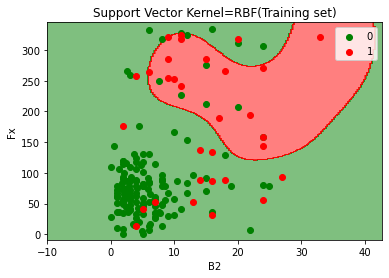

In [37]:
#Support Vector Category
from sklearn.svm import SVC 
SVC_classifier = SVC(kernel='rbf',C=2, gamma=0.6)
SVC_classifier.fit(X_train_scaled, y_train_cat)

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_cat_scaled), y_cat
#X_set, y_set = X_train_cat, y_train_cat
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, SVC_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('green','red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green','red'))(i), label = j)
plt.title('Support Vector Kernel=RBF(Training set)')
plt.xlabel('B2')
plt.ylabel('Fx')
plt.legend()
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


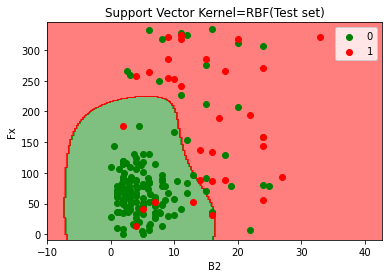

In [38]:
#Support Vector Category (Test Set)
from sklearn.svm import SVC 
SVC_classifier = SVC(kernel='rbf',C=2, gamma=0.6)
SVC_classifier.fit(X_test_scaled, y_test_cat)

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_cat_scaled), y_cat

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, SVC_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('green','red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green','red'))(i), label = j)
plt.title('Support Vector Kernel=RBF(Test set)')
plt.xlabel('B2')
plt.ylabel('Fx')
plt.legend()
plt.show();

In [121]:
np.unique(y_set)

array([0, 1], dtype=int64)